## 사용할 데이터 : 서울시 기간별 시간평균 대기환경 정보 2019 04

### 목적 : 시간대별 사람들의 이동양상과 대기물질의 농도 관계 파악

### 1. 데이터 불러오기

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
time_1904=pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2019.04.csv',encoding = 'cp949')

### EDA : 데이터의 형태, 자료형 분석

In [3]:
print(time_1904.info())
#2019040100 시~2019043013 시까지 1시간 간격

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            18000 non-null  int64  
 1   권역코드            18000 non-null  int64  
 2   권역명             18000 non-null  object 
 3   측정소코드           18000 non-null  int64  
 4   측정소명            18000 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   18000 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  18000 non-null  int64  
 7   초미세먼지(㎍/㎥)      18000 non-null  int64  
 8   오존(ppm)         18000 non-null  float64
 9   이산화질소농도(ppm)    18000 non-null  float64
 10  일산화탄소농도(ppm)    18000 non-null  float64
 11  아황산가스농도(ppm)    18000 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.6+ MB
None


In [4]:
#자료 생김새 파악
time_1904.head()

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,201904302300,100,도심권,111123,종로구,27,34,14,0.019,0.046,0.5,0.003
1,201904302300,100,도심권,111121,중구,25,30,14,0.022,0.047,0.5,0.003
2,201904302300,100,도심권,111131,용산구,20,28,12,0.018,0.049,0.5,0.003
3,201904302300,101,서북권,111181,은평구,32,44,15,0.032,0.028,0.4,0.004
4,201904302300,101,서북권,111201,마포구,33,42,21,0.015,0.036,0.4,0.004


In [5]:
#데이터 형태 파악
time_1904.shape

(18000, 12)

In [6]:
#결측치 파악
time_1904.isna().sum()
#결측치 없음->결측치 보간 따로 진행하지X

측정일시              0
권역코드              0
권역명               0
측정소코드             0
측정소명              0
미세먼지 1시간(㎍/㎥)     0
미세먼지 24시간(㎍/㎥)    0
초미세먼지(㎍/㎥)        0
오존(ppm)           0
이산화질소농도(ppm)      0
일산화탄소농도(ppm)      0
아황산가스농도(ppm)      0
dtype: int64

### 2. 데이터 정리

### 측정시간 별로 groupby

In [28]:
#칼럼 이름 변경
time_1904=time_1904.rename(columns={'미세먼지 1시간(㎍/㎥)':'dust1h','미세먼지 24시간(㎍/㎥)':'dust24h','이산화질소농도(ppm)':'no2','초미세먼지(㎍/㎥)':'fdust','아황산가스농도(ppm)':'so2','오존(ppm)':'o3','이산화질소농도(ppm)':'no2','일산화탄소농도(ppm)':'co'})

In [29]:
#복사본 만들기
time_df_1904=time_1904

In [30]:
#측정 일시 타입 변경
time_df_1904=time_df_1904.astype({'측정일시':'str'})
time_df_1904['timeline1904']=time_df_1904['측정일시'].str[8:10]

In [33]:
#groupby :측정시간+측정소별
time_df1_1904=time_df_1904.groupby(['timeline1904','측정소명']).mean()
time_df1_1904.head()

권역코드     측정소코드     dust1h    dust24h      fdust        o3  \
timeline1904 측정소명                                                               
00           강남구   104.0  111261.0  33.100000  33.633333  17.700000  0.018667   
             강동구   104.0  111274.0  37.666667  37.500000  18.900000  0.019967   
             강북구   102.0  111291.0  35.966667  39.833333  15.433333  0.030700   
             강서구   103.0  111212.0  42.233333  42.100000  19.800000  0.022867   
             관악구   103.0  111251.0  48.900000  49.700000  23.200000  0.023333   

                        no2        co       so2  
timeline1904 측정소명                                
00           강남구   0.030933  0.360000  0.005533  
             강동구   0.038833  0.456667  0.003800  
             강북구   0.017000  0.403333  0.002167  
             강서구   0.040467  0.520000  0.005533  
             관악구   0.038667  0.426667  0.004467

In [43]:
#groupby :측정시간
time_df2_1904=time_df_1904.groupby('timeline1904').mean()
time_df2_1904.head()

,권역코드,측정소코드,dust1h,dust24h,fdust,o3,no2,co,so2
timeline1904,,,,,,,,,
00,102.24,111211.04,37.960000,39.793333,19.684000,0.021675,0.035156,0.483733,0.003763
01,102.24,111211.04,37.556000,39.316000,19.925333,0.021225,0.033891,0.494133,0.003747
02,102.24,111211.04,36.138667,38.692000,19.742667,0.022325,0.030483,0.490933,0.003720
03,102.24,111211.04,35.590667,38.074667,20.464000,0.022155,0.028635,0.488400,0.003669
04,102.24,111211.04,35.092000,37.308000,20.466667,0.021225,0.027949,0.486133,0.003621


### 일변량 시각화

In [44]:
time_df3_1904=time_df2_1904.reset_index()
time_df3_1904.head()

,timeline1904,권역코드,측정소코드,dust1h,dust24h,fdust,o3,no2,co,so2
0,00,102.24,111211.04,37.960000,39.793333,19.684000,0.021675,0.035156,0.483733,0.003763
1,01,102.24,111211.04,37.556000,39.316000,19.925333,0.021225,0.033891,0.494133,0.003747
2,02,102.24,111211.04,36.138667,38.692000,19.742667,0.022325,0.030483,0.490933,0.003720
3,03,102.24,111211.04,35.590667,38.074667,20.464000,0.022155,0.028635,0.488400,0.003669
4,04,102.24,111211.04,35.092000,37.308000,20.466667,0.021225,0.027949,0.486133,0.003621


#### 1) 미세먼지 1시간

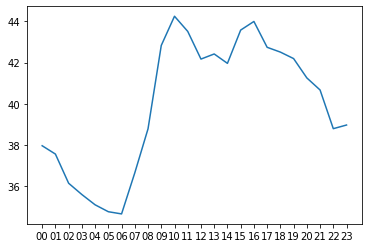

In [46]:
plt.plot(time_df3_1904['timeline1904'], time_df3_1904['dust1h'])
#9시, 16시 경에 가장 높음

#### 2) 초미세먼지

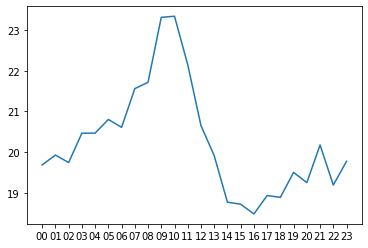

In [47]:
plt.plot(time_df3_1904['timeline1904'], time_df3_1904['fdust'])
#9시 경에 최대, 16시 이후에 다시 증가

#### 3) 오존

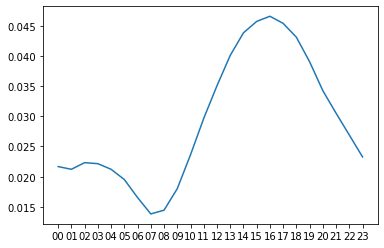

In [48]:
plt.plot(time_df3_1904['timeline1904'], time_df3_1904['o3'])
#해가 있는 시간대에 계속 증가

#### 4) 이산화질소

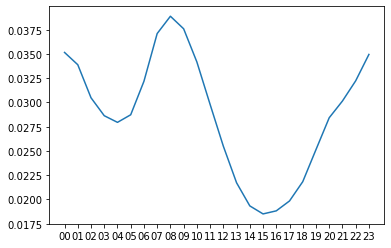

In [49]:
plt.plot(time_df3_1904['timeline1904'], time_df3_1904['no2'])
#해가 있는 시간대에 계속 감소
#9시 최대, 16시 경에 다시 증가

#### 5) 일산화탄소

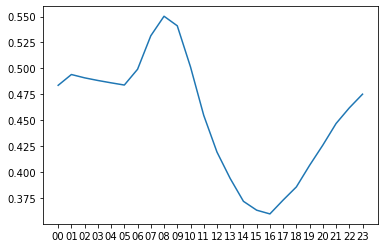

In [50]:
plt.plot(time_df3_1904['timeline1904'], time_df3_1904['co'])
#9시 경에 최대, 16시 경에 다시 증가

#### 6) 아황산가스

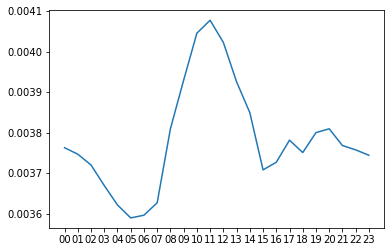

In [51]:
plt.plot(time_df3_1904['timeline1904'], time_df3_1904['so2'])
#아침에 증가, 오전 중에 최대가 됨

#### 대부분의 대기물질이 오전 출근 시간 (5시~9시), 오후 퇴근시간(16시 이후) 대에서 증가하거나 최대치를 나타내는 양상을 보임
#### -> 출퇴근 교통량 증가와 연관?

### 다변량 시각화 : 상관관계 분석

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda

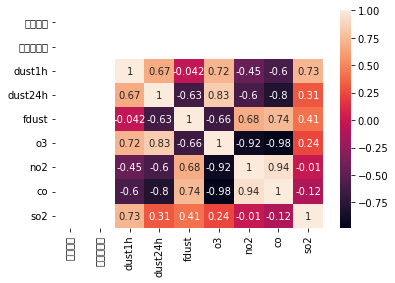

In [54]:
sns.heatmap(time_df3_1904.corr(), annot=True)
plt.show()

#### 오존과 이산화 질소 / 오존과 일산화탄소의 상관관계가 높음

### 1) 오존과 이산화 질소

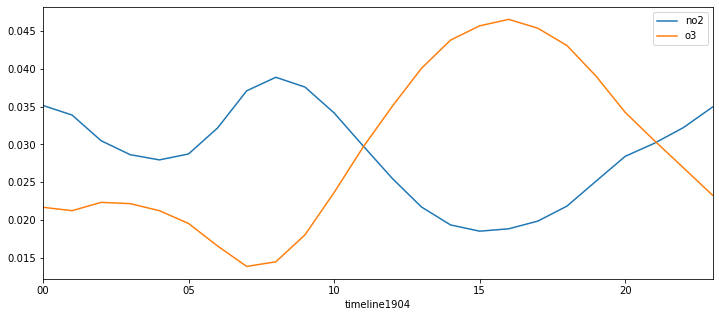

In [55]:
time_df2_1904[['no2','o3']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
# 이산화질소와 오존 사이의 증감이 서로 반대되는 양상으로 나타남

### 2) 오존과 일산화탄소

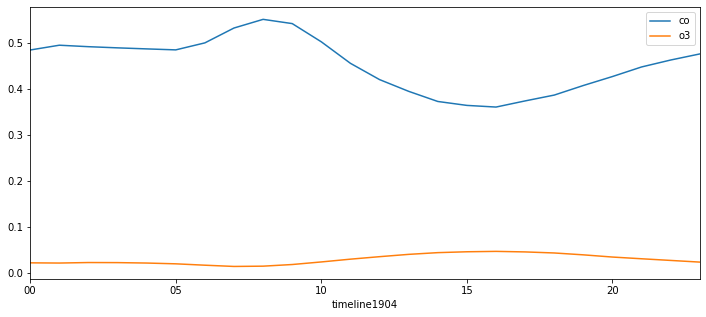

In [57]:
time_df2_1904[['co','o3']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
# 일산화탄소와 오존 사이의 증감도 서로 반대되는 양상으로 나타남

#### 오존은 2차 오염물질로 1차 오염물질의 화학반응을 통해 발생한다. 그 과정에서 2차오염물질(오존)이 증가하는 만큼 1차 오염물질은 소비되는 것이기에 그 농도가 감소한다.
#### ->이산화질소와 일산화탄소가 오존을 생성하는 1차오염물질에 해당한다고 생각해볼 수 있을 것 같다.